In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

In [3]:
customers = pd.read_csv('C:/Users/opera/Downloads/new_train.csv')
customers.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [4]:
customers.shape

(32950, 16)

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [6]:
customers.select_dtypes(include='object').describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,32950,32950,32950,32950,32950,32950,32950,32950,32950,32950,32950
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,8314,19953,9736,26007,17254,27131,20908,11011,6857,28416,29238


In [7]:
customers.select_dtypes(include='int64').describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [8]:
name = []
unique = []
count = []
col_type = []

for col in customers.columns:
    n = col
    u = customers[col].unique()
    c = customers[col].nunique()
    d = customers[col].dtype
        
    name.append(n)
    unique.append(u)
    count.append(c)
    col_type.append(d)
    
df = pd.DataFrame({'Feature': name, 'Unique_features': unique, 'Total_features': count, 'Data_type': col_type})
df


,Feature,Unique_features,Total_features,Data_type
0,age,"[49, 37, 78, 36, 59, 29, 26, 30, 50, 33, 44, 3...",75,int64
1,job,"[blue-collar, entrepreneur, retired, admin., s...",12,object
2,marital,"[married, divorced, single, unknown]",4,object
3,education,"[basic.9y, university.degree, basic.4y, high.s...",8,object
4,default,"[unknown, no, yes]",3,object
5,housing,"[no, yes, unknown]",3,object
6,loan,"[no, yes, unknown]",3,object
7,contact,"[cellular, telephone]",2,object
8,month,"[nov, jul, may, jun, aug, mar, oct, apr, sep, ...",10,object
9,day_of_week,"[wed, mon, tue, fri, thu]",5,object


In [9]:
na_features = [features for features in customers.columns if customers[features].isnull().sum() > 0]

for feature in na_features:
    print(feature, np.round(customers[feature].isnull().mean(),2), '% missing values')
else:
    print('No missing values found')


No missing values found


In [10]:
cat_features= [feature for feature in customers.columns if ((customers[feature].dtypes == 'O') & (feature not in ['y']))]
cat_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

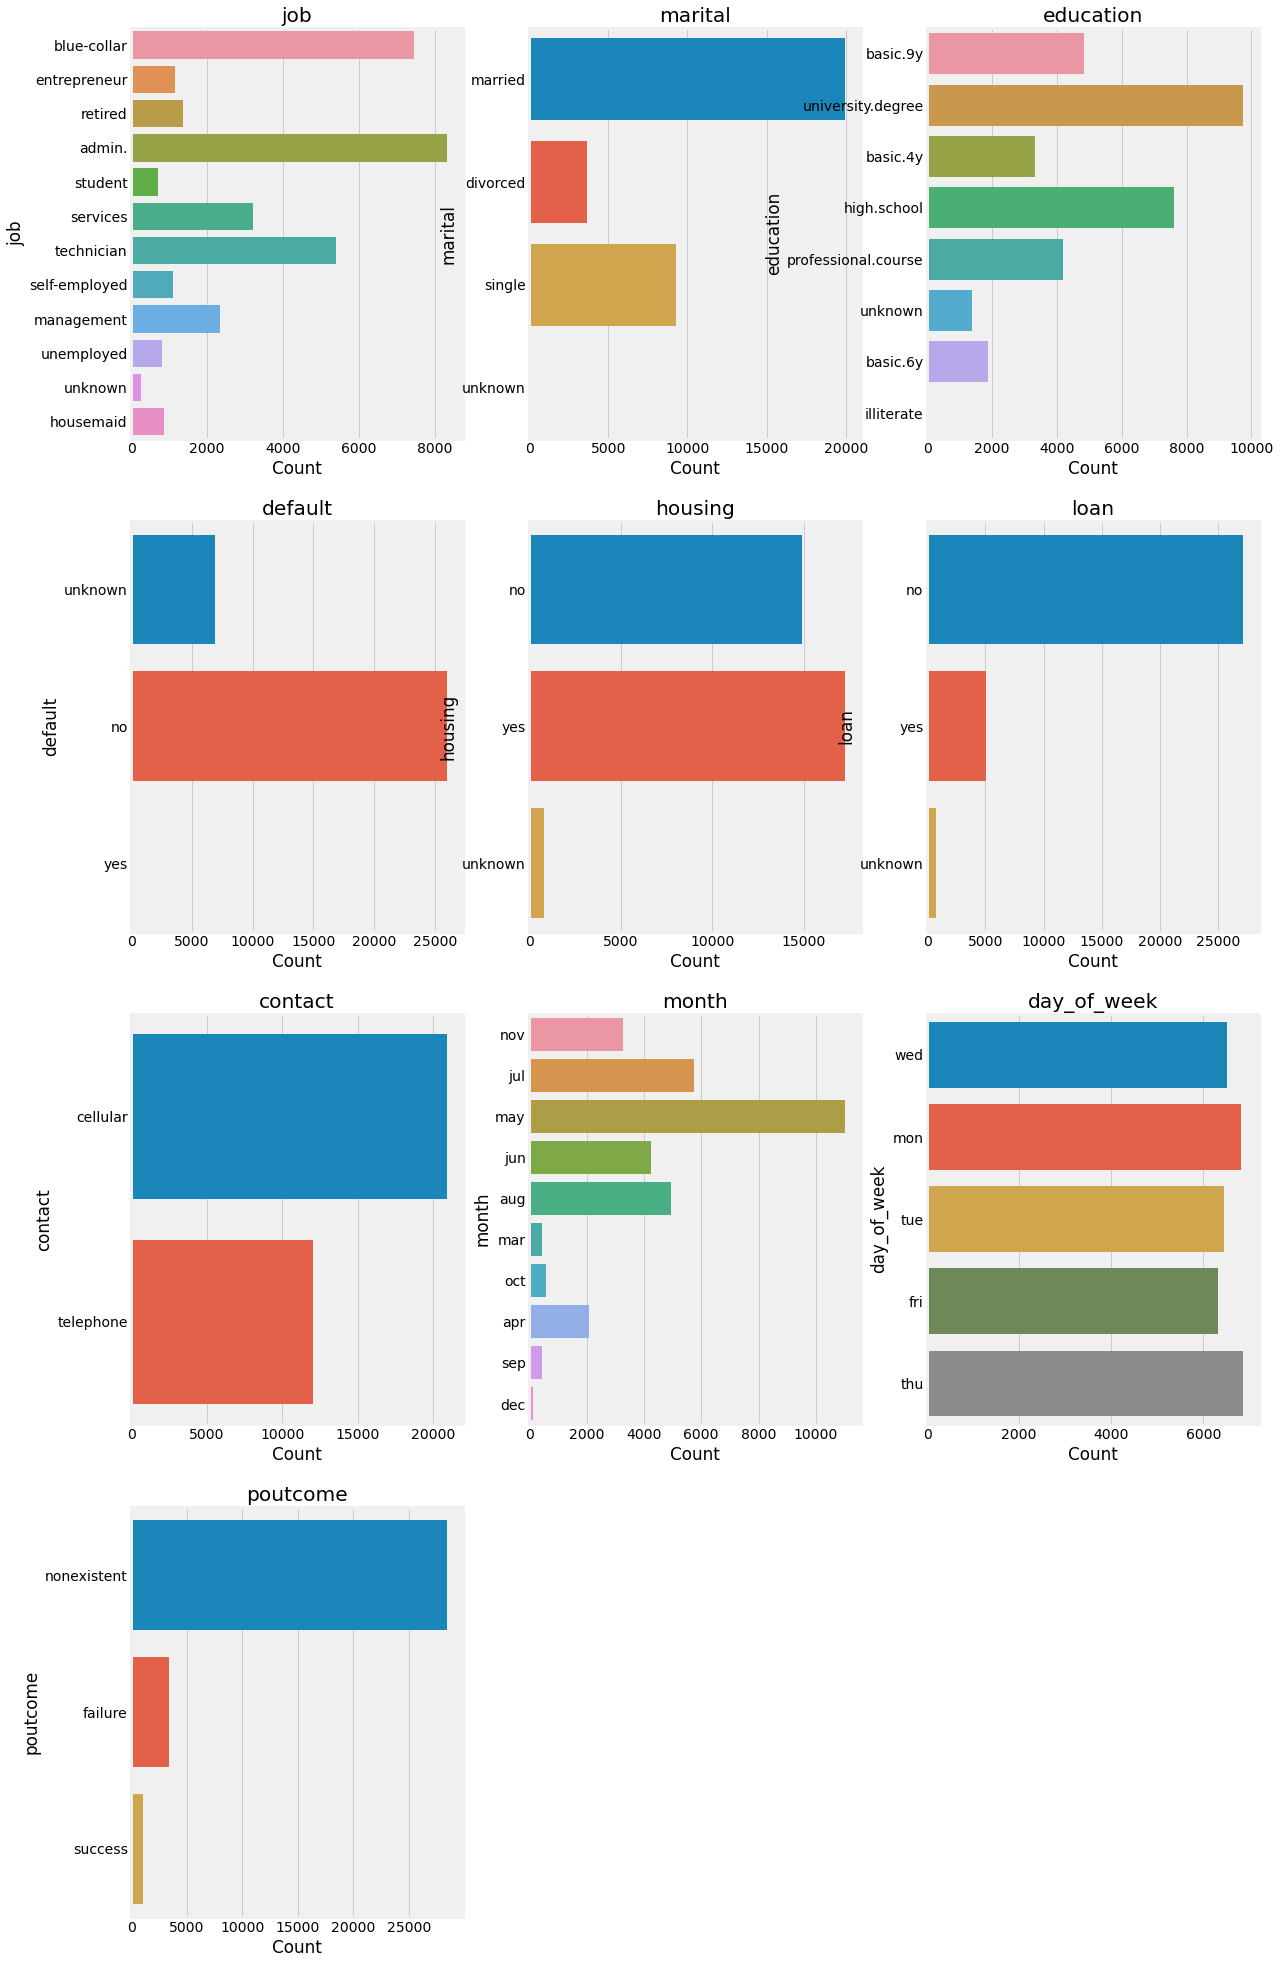

In [11]:
plt.figure(figsize=(18,100), facecolor='white')
plotnumber = 1

for categorical_feature in cat_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=customers)
    plt.xlabel("Count")
    plt.title(categorical_feature)
    plotnumber+=1
# plt.tight_layout()    
plt.show()    

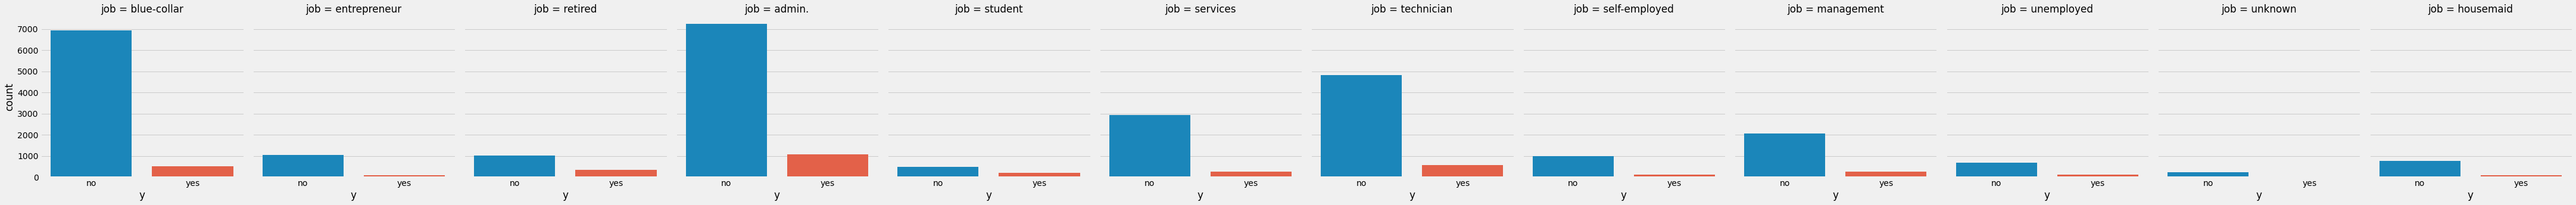

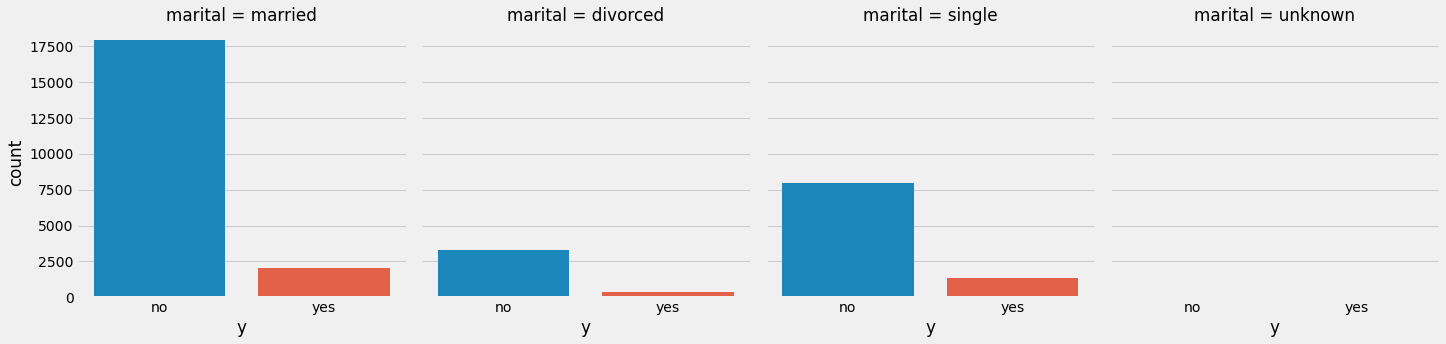

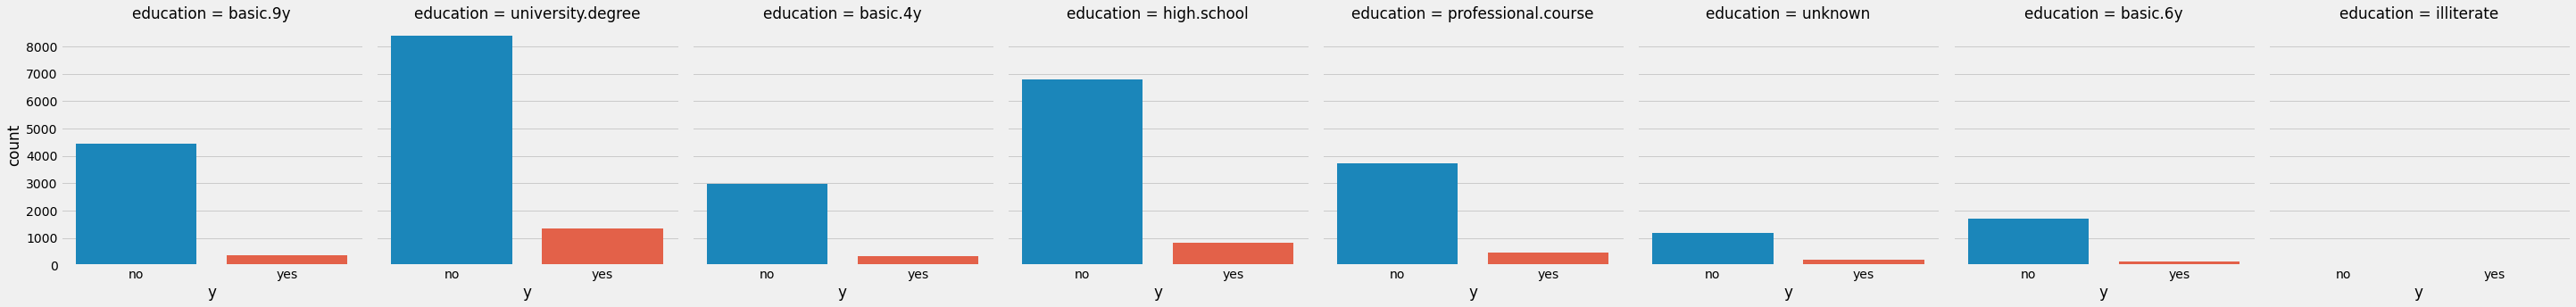

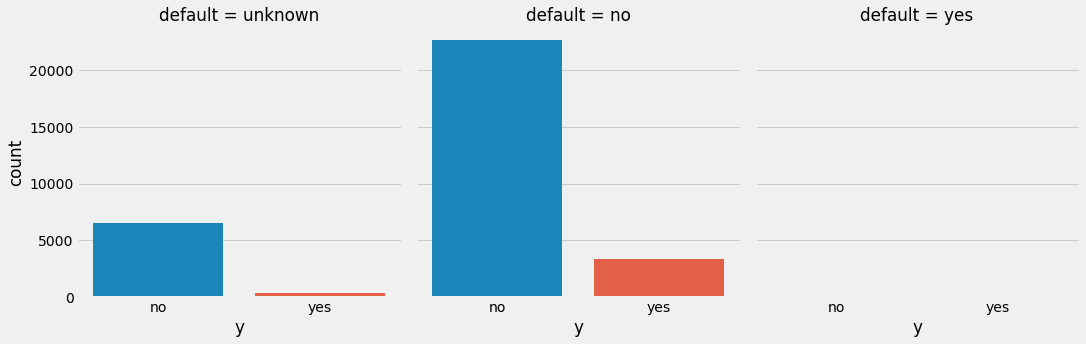

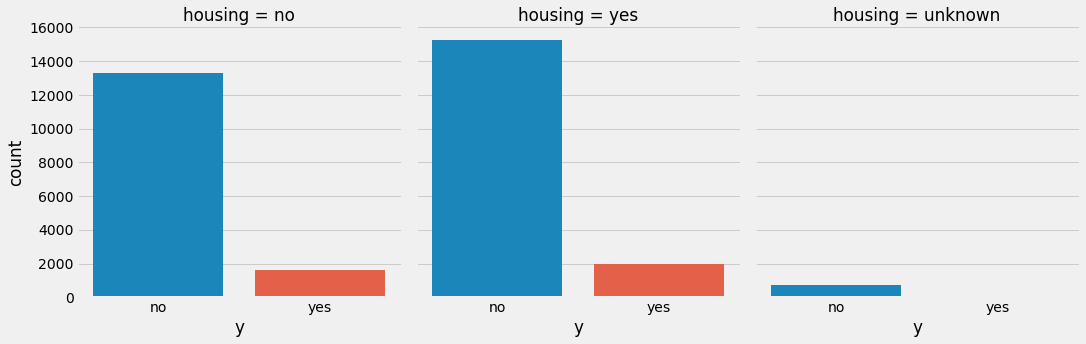

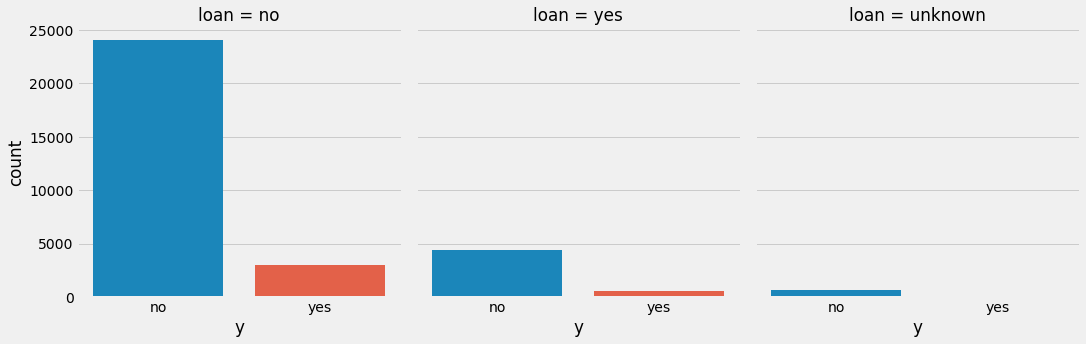

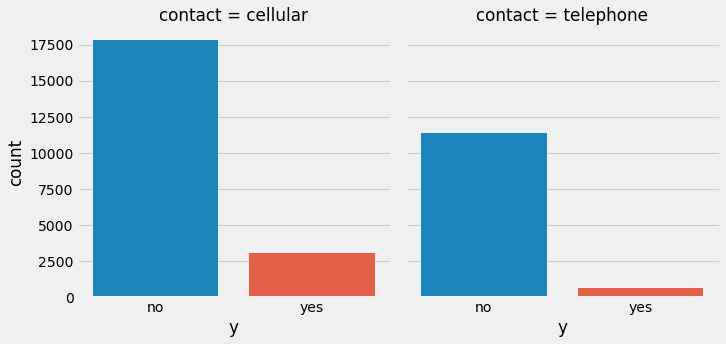

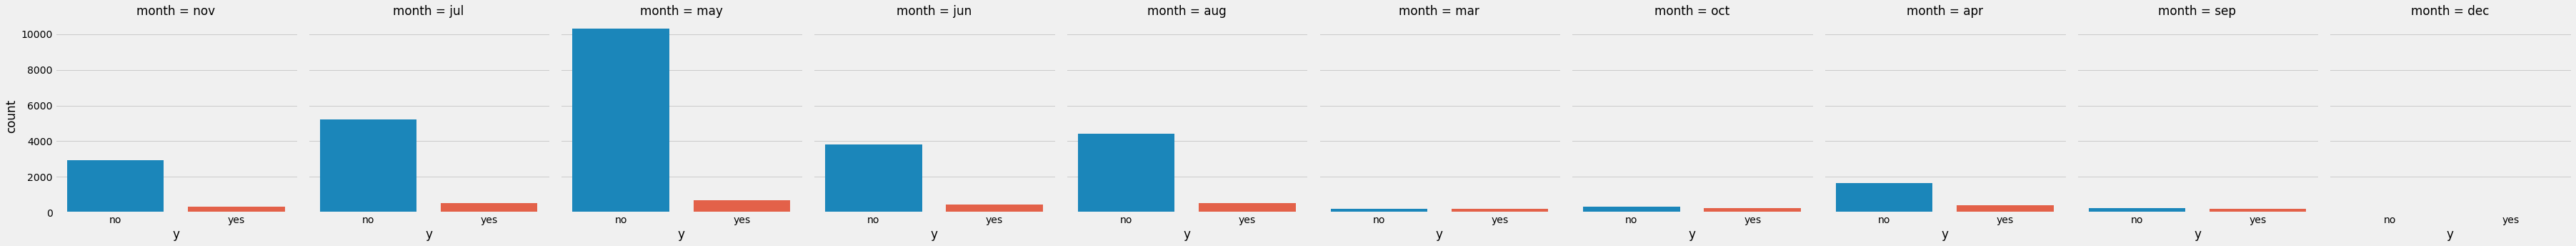

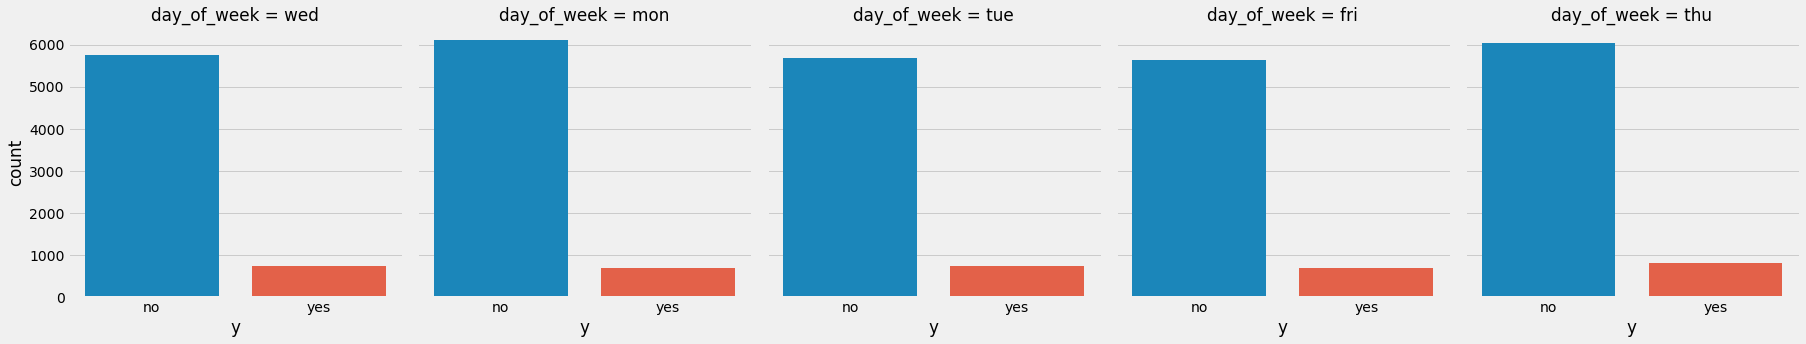

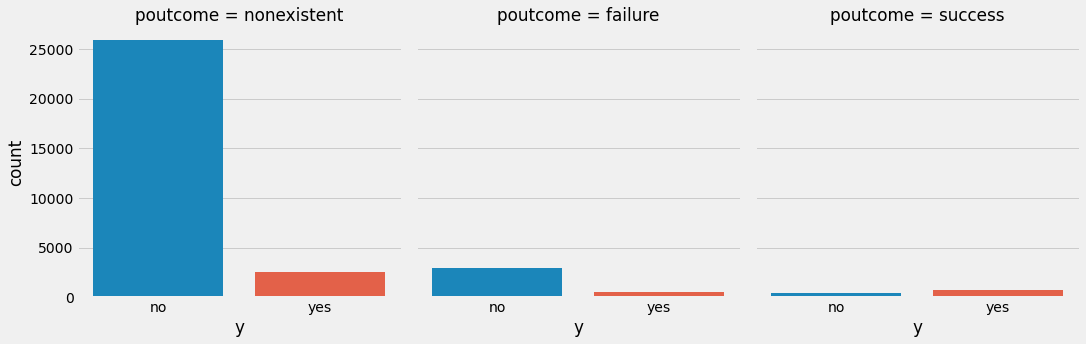

In [12]:
for categorical_feature in cat_features:
    sns.catplot(x='y', col=categorical_feature, kind='count', data=customers)
plt.show()

In [13]:
for categorical_feature in cat_features:
    print(customers.groupby(['y', categorical_feature]).size())

y    job          
no   admin.           7244
     blue-collar      6926
     entrepreneur     1060
     housemaid         769
     management       2076
     retired          1018
     self-employed     980
     services         2942
     student           494
     technician       4815
     unemployed        682
     unknown           232
yes  admin.           1070
     blue-collar       515
     entrepreneur      100
     housemaid          86
     management        269
     retired           348
     self-employed     119
     services          254
     student           217
     technician        585
     unemployed        116
     unknown            33
dtype: int64
y    marital 
no   divorced     3304
     married     17933
     single       7947
     unknown        54
yes  divorced      371
     married      2020
     single       1310
     unknown        11
dtype: int64
y    education          
no   basic.4y               2978
     basic.6y               1709
     basic.9y     

In [14]:
numerical_features = [feature for feature in customers.columns if((customers[feature].dtypes != 'O') & (feature not in ['y']))]

print('Numerical features are:', len(numerical_features))

customers[numerical_features].head()

Numerical features are: 5


,age,duration,campaign,pdays,previous
0,49,227,4,999,0
1,37,202,2,999,1
2,78,1148,1,999,0
3,36,120,2,999,0
4,59,368,2,999,0


In [15]:
discrete_feature = [feature for feature in numerical_features if len(customers[numerical_features].nunique())<5]

print('Discrete variable count : {}'.format(len(discrete_feature)) )
discrete_feature

Discrete variable count : 0


[]

In [16]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_feature+['y']]

print('Continuous feature count :{}'.format(len(continuous_features)))
continuous_features

Continuous feature count :5


['age', 'duration', 'campaign', 'pdays', 'previous']

### Distribution of continuous numerical features

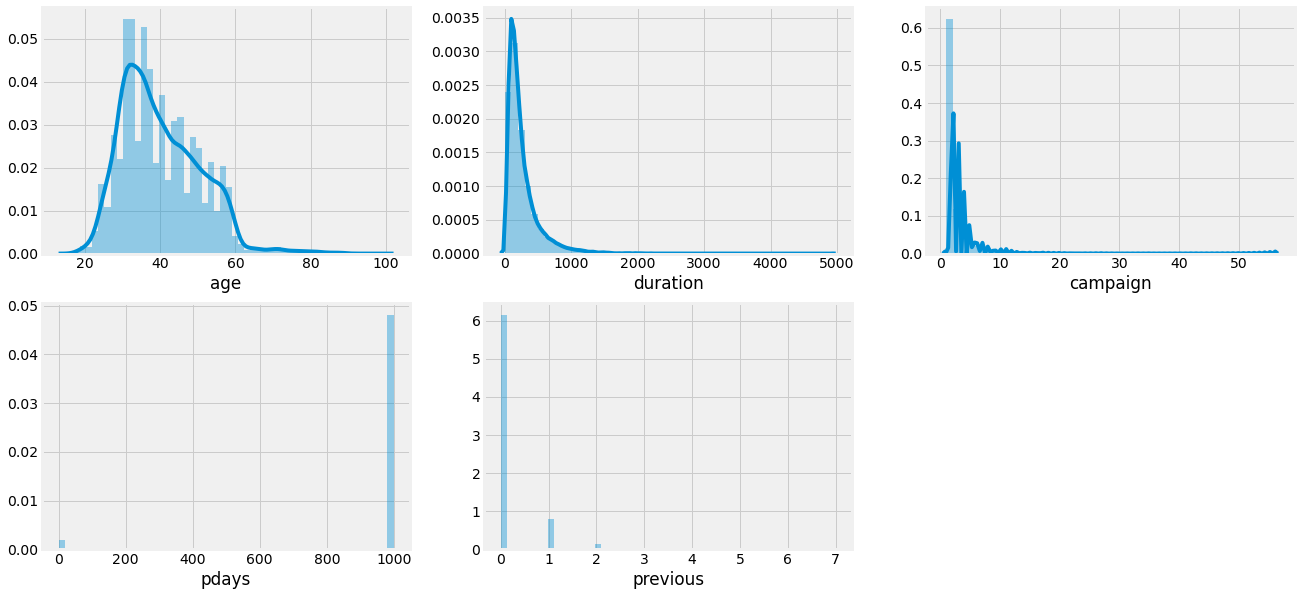

In [17]:
# Univariate distribution of continuous features observations

plt.figure(figsize=(20,60), facecolor='white')

plotnumber = 1

for continuous_feature in continuous_features:
    ax = plt.subplot(12, 3, plotnumber)
    sns.distplot(customers[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber += 1
plt.show()

### Relationship between continuous numerical features and Labels

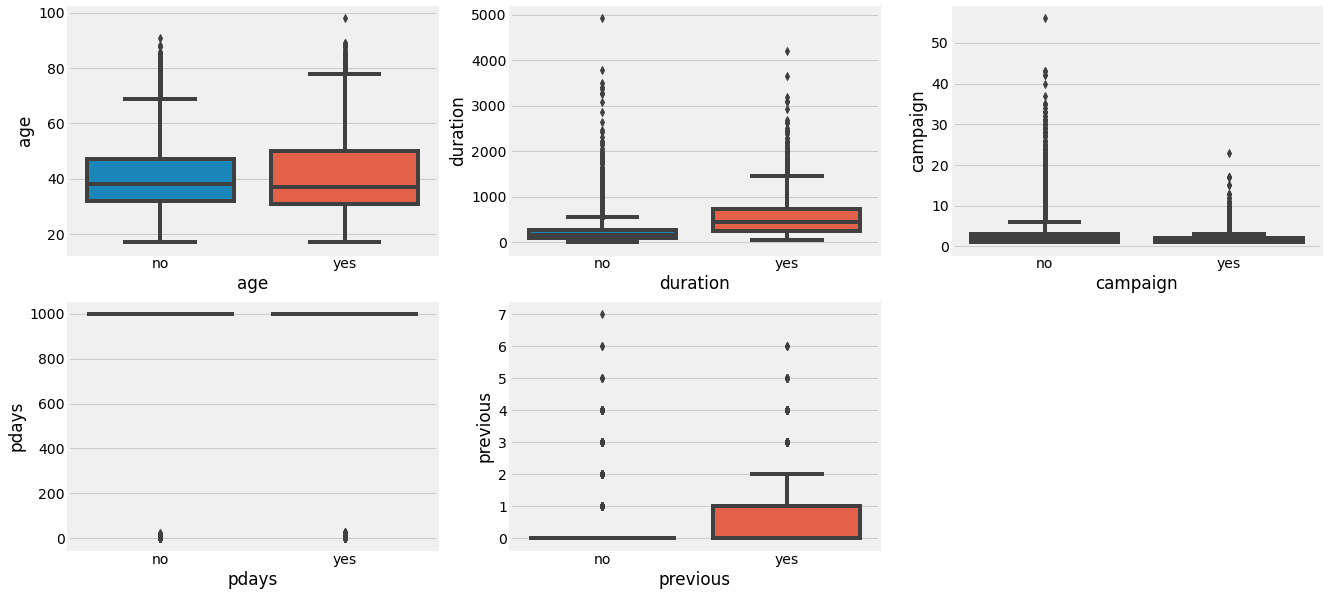

In [18]:
# Boxplot to show relationship between continuous features and labels

plt.figure(figsize=(20,60), facecolor='white')

fignumber = 1

for feature in continuous_features:
    ax = plt.subplot(12,3,fignumber)
    sns.boxplot(x = 'y', y = customers[feature], data=customers)
    plt.xlabel(feature)
    fignumber += 1
plt.show()


### Outliers in Numerical Features

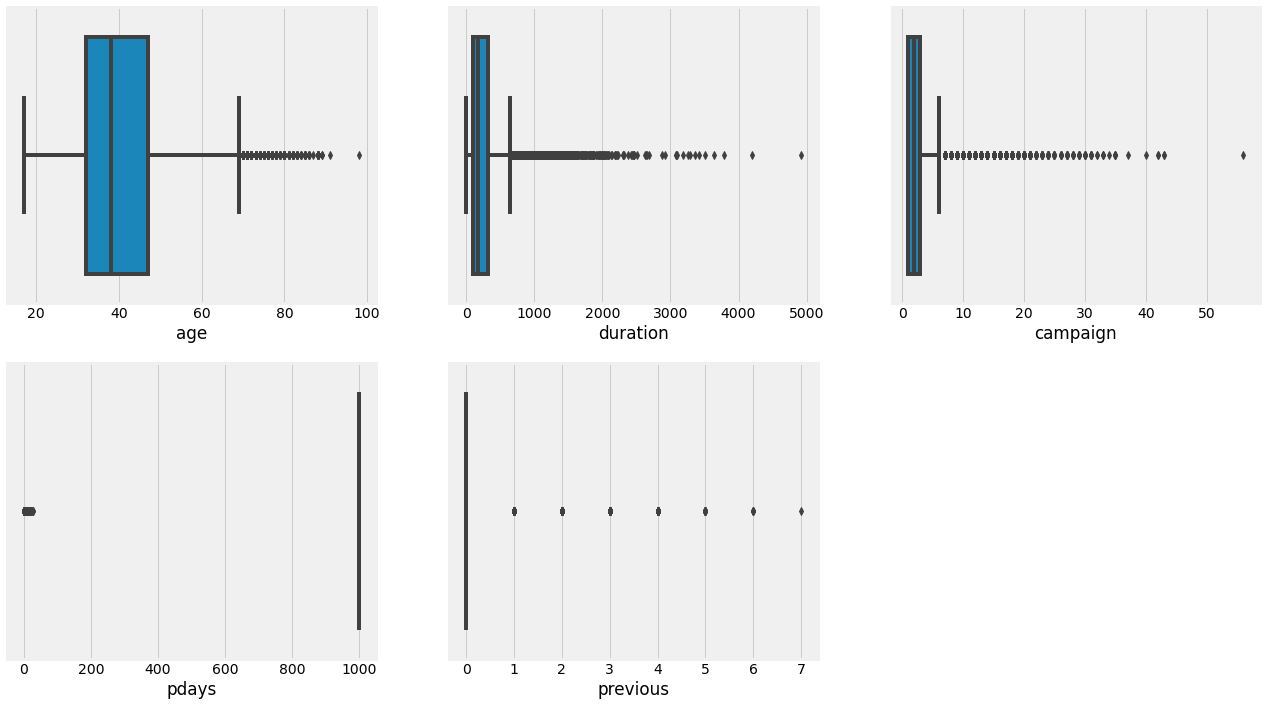

In [19]:
plt.figure(figsize=(20, 60), facecolor='white')

plotnumber = 1

for feature in numerical_features:
    ax = plt.subplot(10, 3, plotnumber)
    sns.boxplot(x=customers[feature])
    plt.xlabel(feature)
    plotnumber += 1
plt.show()

In [20]:
# We shall remove 'pdays' feature in feature engineering section since 75 percentile values are 999 only 
# and they do not contribute to decision making

customers['pdays'].describe()

count    32950.000000
mean       962.052413
std        187.951096
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64

In [21]:
# We shall remove 'previous' feature in feature engineering section since 75 percentile values are ZERO  
# and they do not contribute to decision making

customers['previous'].describe()

count    32950.000000
mean         0.174719
std          0.499025
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64

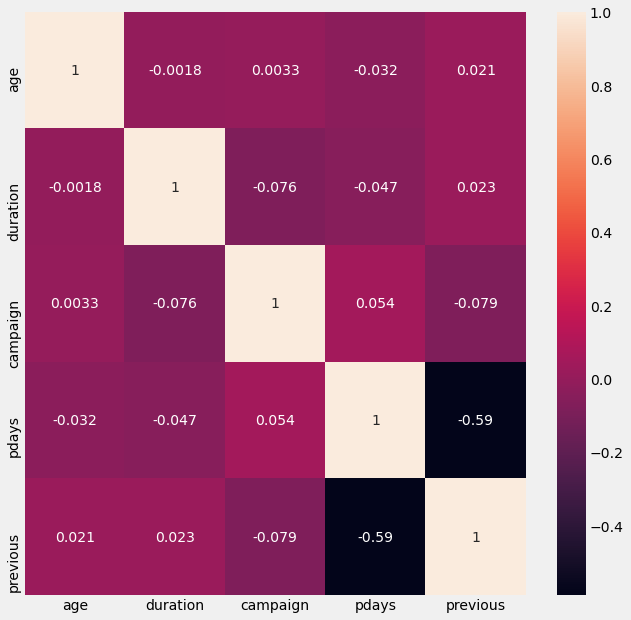

In [22]:
cor_mat = customers.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor_mat, annot=True)

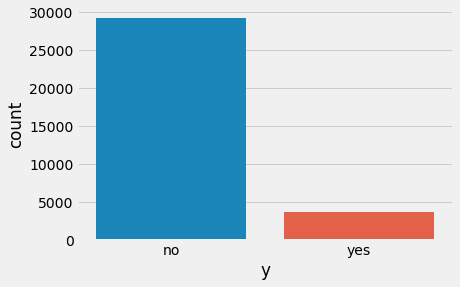

In [23]:
# Distribution of data in Labels (Target variable)

plt.figure(figsize=(6,4))
sns.countplot(x='y', data=customers)
plt.show()

In [24]:
customers['y'].groupby(customers['y']).count()

y
no     29238
yes     3712
Name: y, dtype: int64

## Feature Engineering

#### Here in this section I'm going to perform below tasks

- Droping unwanted features
- Handling missing values : No missing values found as per EDA
- Handling categorical features
- Performing feature scaling
- Removing outliers

#### Removing 'pdays' and 'previous' features from dataframe since more than 75 percentile values belong to a single value and these two features do not play any important role in decision making

In [25]:
customers2 = customers.drop(['pdays', 'previous'], axis=1)
customers2.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,failure,no


#### Removing outliers from 'age', 'duration' and 'campaign' features using IQR

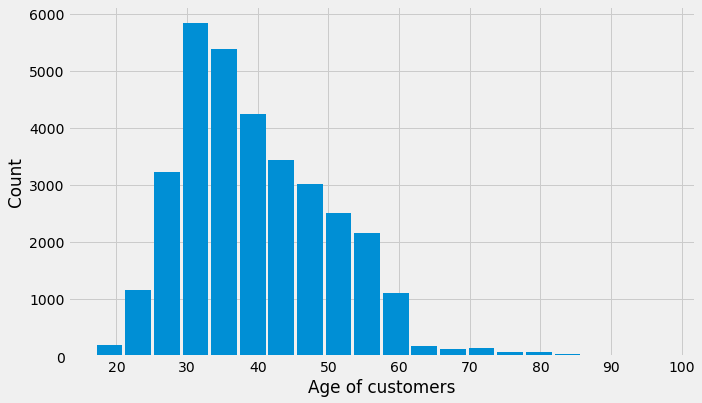

In [26]:
plt.hist(customers2.age, bins=20, rwidth=.9)
plt.xlabel('Age of customers')
plt.ylabel('Count')
plt.show()

In [27]:
quartile1, quartile3 = customers2.age.quantile([0.25, 0.75])
print('First quartile:', quartile1)
print('Third quartile:', quartile3)

First quartile: 32.0
Third quartile: 47.0


In [28]:
iqr = quartile3 - quartile1
iqr

15.0

In [29]:
lower = quartile1 - 1.5*iqr
lower

9.5

In [30]:
upper = quartile3 + 1.5*iqr
upper

69.5

In [31]:
# removing ages below and above IQR range

customers2['age'] = customers2[(customers2.age > lower) & (customers2.age < upper)]

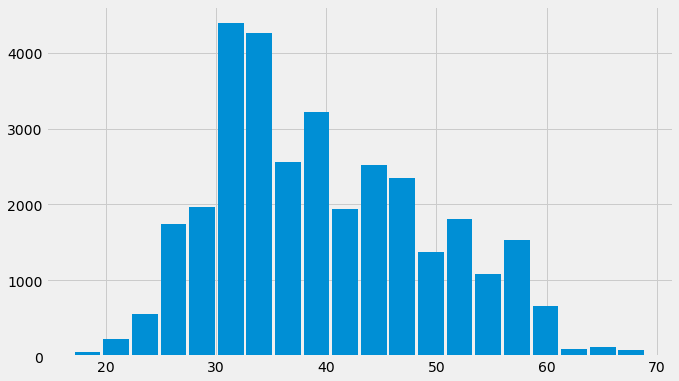

In [32]:
plt.hist(customers2.age, bins=20, rwidth=.9)
plt.show()


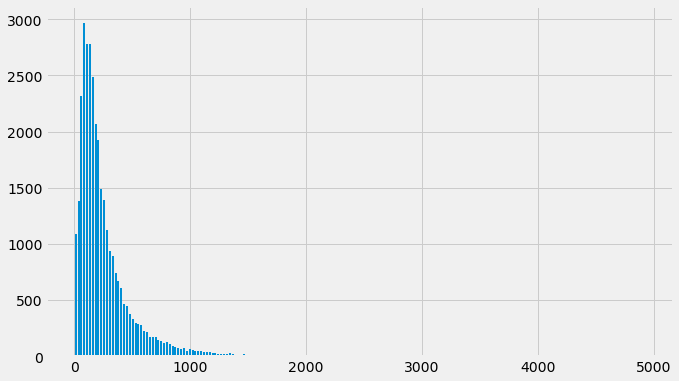

In [33]:
plt.hist(customers2.duration, bins=200, rwidth=.7)
plt.show()

In [34]:
quartile1, quartile3 = customers2.duration.quantile([0.25, 0.75])
print('First quartile is: ', quartile1)
print('Third quartile is:', quartile3)

First quartile is:  103.0
Third quartile is: 319.0


In [35]:
iqr = quartile3 - quartile1
iqr

216.0

In [36]:
lower = quartile1 - 1.5 * iqr
upper = quartile3 + 1.5 * iqr

lower, upper

(-221.0, 643.0)

In [37]:
customers2['duration'] = customers2[(customers2.duration > lower) & (customers2.duration < upper)]

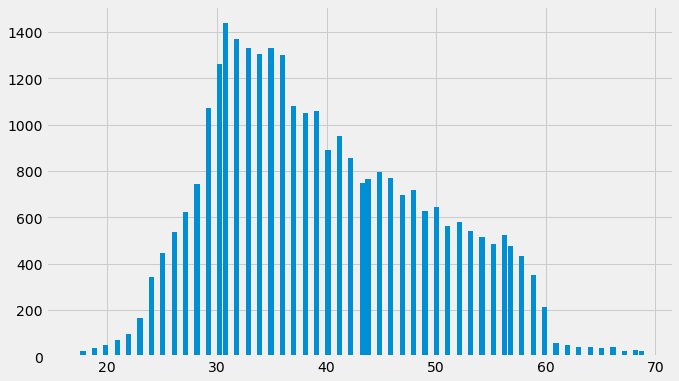

In [38]:
plt.hist(customers2.duration, bins=100, rwidth=.9)
plt.show()

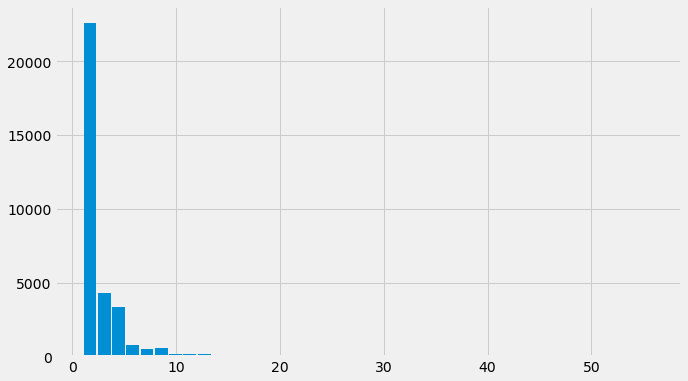

In [39]:
plt.hist(customers2.campaign, bins=40, rwidth=.9)
plt.show()

In [40]:
quartile1, quartile3 = customers2.campaign.quantile([0.25, 0.75])
print('First quartile is:', quartile1)
print('Third quartile is:', quartile3)

First quartile is: 1.0
Third quartile is: 3.0


In [41]:
iqr = quartile3 - quartile1
iqr

2.0

In [42]:
lower = quartile1 - 1.5 * iqr
upper = quartile3 + 1.5 * iqr
lower, upper

(-2.0, 6.0)

In [43]:
customers2['campaign'] = customers2[(customers2.campaign > lower) & (customers2.campaign < upper)]

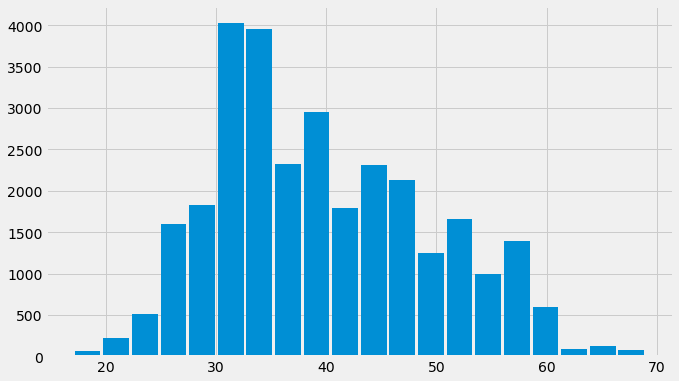

In [44]:
plt.hist(customers2.campaign, bins=20, rwidth=.9)
plt.show()

In [45]:
customers2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,49,49,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,37,37,failure,no
2,NaN,retired,married,basic.4y,no,no,no,cellular,jul,mon,NaN,NaN,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,36,36,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,59,59,nonexistent,no


In [46]:
customers2.isna().sum()

age             368
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration       2723
campaign       3038
poutcome          0
y                 0
dtype: int64

In [47]:
customers3 = customers2.dropna()

In [48]:
customers3.isna().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
poutcome       0
y              0
dtype: int64

### Coverting categorical features to numerical features

In [49]:
job = {
    'admin.': 0,
    'blue-collar': 1,
    'entrepreneur': 6,
    'housemaid': 8,
    'management': 4,
    'retired': 5,
    'self-employed': 7,
    'services': 3,
    'student': 10,
    'technician': 2,
    'unemployed': 9,
    'unknown': 11
    }

In [50]:
customers3['job'] = customers3.job.map(job)

In [51]:
marital = {
    'married': 0,
    'single': 1,
    'divorced': 2,
    'unknown': 3    
}

In [52]:
education = {
    'university.degree': 0,
    'high.school': 1,
    'basic.9y':2,
    'professional.course':3,
    'basic.4y':4,
    'basic.6y': 5,
    'unknown':6,
    'illiterate':7
}

In [53]:
default = {
    'no': 0,
    'unknown':1,
    'yes':2
}

In [54]:
housing = {
    'yes':0,
    'no':1,
    'unknown':2
}

In [55]:
loan = {
    'no': 0,
    'yes': 1,
    'unknown': 2
}

In [56]:
contact = {
    'cellular': 0,
    'telephone':1
}

In [57]:
month = {
    'mar':0,
    'apr':1,
    'may':2,
    'jun':3,
    'jul':4,
    'aug':5,
    'sep':6,
    'oct':7,
    'nov':8,
    'dec':9
}

In [58]:
days = {
    'mon':0,
    'tue':1,
    'wed':2,
    'thu':3,
    'fri':4,
}

In [59]:
poutcome = {
    'nonexistent':0,
    'failure':1,
    'success':2
}

In [60]:
y = {
    'no':0,
    'yes':1
}

In [61]:
customers3['marital'] = customers3.marital.map(marital)

In [62]:
customers3['education'] = customers3.education.map(education)

In [63]:
customers3['default'] = customers3.default.map(default)

In [64]:
customers3['housing'] = customers3.housing.map(housing)

In [65]:
customers3['loan'] = customers3.loan.map(loan)

In [66]:
customers3['contact'] = customers3.contact.map(contact)

In [67]:
customers3['month'] = customers3.month.map(month)

In [68]:
customers3['day_of_week'] = customers3.day_of_week.map(days)

In [69]:
customers3['poutcome'] = customers3.poutcome.map(poutcome)

In [70]:
customers3['y'] = customers3.y.map(y)

In [71]:
customers3.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,49,1,0,2,1,1,0,0,8,2,49,49,0,0
1,37,6,0,0,0,1,0,1,8,2,37,37,1,0
3,36,0,0,0,0,0,0,1,2,0,36,36,0,0
4,59,5,2,0,0,1,0,0,3,1,59,59,0,0
5,29,0,1,0,0,1,0,0,5,2,29,29,0,0


In [72]:
customers3.corr().style.background_gradient(cmap='coolwarm')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
job,1.000000,-0.003836,0.075296,0.021848,0.002362,-0.004177,0.002267,0.039265,-0.012290,0.052186,0.055139
marital,-0.003836,1.000000,-0.115174,-0.101624,-0.005005,-0.003932,-0.046548,-0.001661,-0.008953,0.032456,0.029809
education,0.075296,-0.115174,1.000000,0.197334,0.016018,-0.003441,0.099557,-0.091203,0.013265,-0.037299,-0.046898
default,0.021848,-0.101624,0.197334,1.000000,0.017180,0.004166,0.135093,-0.088612,-0.003698,-0.115199,-0.116202
housing,0.002362,-0.005005,0.016018,0.017180,1.000000,0.238900,0.089215,-0.032733,0.011760,-0.025978,-0.011855
loan,-0.004177,-0.003932,-0.003441,0.004166,0.238900,1.000000,0.009644,-0.008946,0.003933,-0.008032,-0.003819
contact,0.002267,-0.046548,0.099557,0.135093,0.089215,0.009644,1.000000,-0.324674,0.020521,-0.230852,-0.148911
month,0.039265,-0.001661,-0.091203,-0.088612,-0.032733,-0.008946,-0.324674,1.000000,-0.009250,0.056655,0.039825
day_of_week,-0.012290,-0.008953,0.013265,-0.003698,0.011760,0.003933,0.020521,-0.009250,1.000000,0.005047,0.008021
poutcome,0.052186,0.032456,-0.037299,-0.115199,-0.025978,-0.008032,-0.230852,0.056655,0.005047,1.000000,0.317915


### Splitting the dataset into Train-Test set

In [73]:
X = customers3.drop(['y'], axis=1)
y = customers3['y']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [74]:
len(X_train)

20793

In [75]:
len(X_test)

6932

### Model Selection

In [76]:
# Using SVM model - Linear kernel

from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')

svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6371    0]
 [ 561    0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      6371
           1       0.00      0.00      0.00       561

    accuracy                           0.92      6932
   macro avg       0.46      0.50      0.48      6932
weighted avg       0.84      0.92      0.88      6932



In [ ]:
# Using SVM model - Polynomial kernel

svclassifier_poly = SVC(kernel='poly', degree=8, gamma = 'auto')

svclassifier_poly.fit(X_train, y_train)

y_pred_poly = svclassifier_poly.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred_poly))
print(classification_report(y_test, y_pred_poly))
print(accuracy_score(y_test, y_pred_poly))


In [ ]:
# Using SVM model - Gaussian kernel

svclassifier_g = SVC(kernel='rbf', gamma='auto')
svclassifier_g.fit(X_train, y_train)

y_pred_g = svclassifier_g.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_pred_g))
print(confusion_matrix(y_test, y_pred_g))
print(accuracy_score(y_test, y_pred_g))


In [ ]:
# Using KNN algorithm

# Applying standard scalar to data to bring the range between 0 and 1
from sklearn.preprocessing import StandardScalar
scalar = StandardScalar()

scalar.fit(X_train)
scalar.fit(X_test)

X_train_KNN = scalar.transform(X_train)
X_test_KNN = scalar.transform(X_test)

#Training and predictions
from sklearn.neighbours import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 19)
classifier.fit(X_train_KNN, y_train)

y_pred_KNN = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_pred_KNN))
print(confusion_matrix(y_test, y_pred_KNN))
print(accuracy_score(y_test, y_pred_KNN))


In [ ]:
# comparing error rate with K value

error = []
'''
Calculating error for K values between 3 and 39, stepping by 2
so that the values of K is odd
'''

for i in range(3, 40, 2):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_KNN, y_train)
    pred_i = knn.predict(X_test_KNN)
    error.append(np.mean(pred_i != y_test)) 
    #here != compares 2 ndarray objects 
    # return value is array of true/false i.e 0/1 values, 
    # of which we are finding the mean values.
    
    
    # The above script executes a loop from 1 to 40. 
    # In each iteration the mean error for predicted values of test set 
    # is calculated and the result is appended to the error list.
    
# The next step is to plot the error values against K values.
plt.figure(figsize=(12, 6))  
plt.plot(range(3, 40,2), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')     

In [ ]:
# Testing model with the best K value:

from sklearn.neighbours import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 19)
classifier.fit(X_train_KNN, y_train)

y_pred_KNN = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_pred_KNN))
print(confusion_matrix(y_test, y_pred_KNN))
print(accuracy_score(y_test, y_pred_KNN))

In [ ]:
#Using Naive Bayes - GaussianNB classification

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Print the accuracy and classification_report and confusion_matrix.
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

In [ ]:
#Using Naive Bayes - MultinomialNB classification

modelM = MultinomialNB()

# Train the model
modelM.fit(xtrain, ytrain)   ## Negative values are not allowed for a Multinomial distribution

# Predict Output 
pred = modelM.predict(xtest)

# Print the accuracy and classification_report and confusion_matrix.
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))  
print(accuracy_score(y_test, pred))

In [ ]:
#Using Naive Bayes - BernoulliNB classification

modelB = BernoulliNB()

modelB.fit(X_train, y_train)  

# Predict Output 
predB = modelB.predict(X_test)

# Print the accuracy and classification_report and confusion_matrix.
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, predB))
print(classification_report(y_test, predB))  
print(accuracy_score(y_test, predB))

### Using RandomForestClassifier model

In [154]:
# Using RandomClassifier model

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [156]:
from sklearn.model_selection import cross_val_score
model_score = cross_val_score(estimator=RandomForestClassifier(), X = X_train, y = y_train, cv=5)
print(model_score)
print(model_score.mean())

[0.91800914 0.91656648 0.91800914 0.91871092 0.92111592]
0.9184823191555578


In [157]:
# Create param

model_param = {
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators': [10, 50, 100, 130],
            'criterion': ['gini', 'entropy'],
            'max_depth': range(2, 4, 1),
            'max_features': ['auto', 'log2']
        }
    }
    
}

In [158]:
# gridsearch

scores = []
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'], param_grid=mp['param'], cv=5, return_train_score=False)
    model_selection.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

In [159]:
scores

[{'model': 'RandomForestClassifier',
  'best_score': 0.9206131650135256,
  'best_params': {'criterion': 'gini',
   'max_depth': 3,
   'max_features': 'log2',
   'n_estimators': 10}}]